#Importing essential modules

In [ ]:
!pip install -U tensorflow_datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

#Defining Training and testing sets

In [ ]:
datasets, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
training_data, testing_data = datasets['train'], datasets['test']

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
classes = metadata.features['label'].names
print("Classes: {}".format(classes))

Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


#Preprocessing

In [ ]:
num_training = metadata.splits['train'].num_examples
num_testing = metadata.splits['test'].num_examples

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

training_data = training_data.map(normalize)
testing_data = testing_data.map(normalize)

training_data = training_data.cache()
testing_data = testing_data.cache()

#Building the model

In [ ]:
def define_model(activation_fun_hidden, activation_fun_output):
  model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28,1)),
    tf.keras.layers.Dense(512, activation = activation_fun_hidden),
    tf.keras.layers.Dense(10, activation = activation_fun_output)
  ])

  return model

In [ ]:
activation1 = tf.nn.relu
activation2 = tf.nn.softmax

Model = define_model(activation1, activation2)
Model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
batch_size = 50
training_data = training_data.cache().repeat().shuffle(num_training).batch(batch_size)
testing_data = testing_data.cache().batch(batch_size)

In [ ]:
Model.fit(training_data, epochs = 30, steps_per_epoch = math.ceil(num_training/batch_size))

Epoch 1/30
1200/1200 [==============================] - 13s 5ms/step - loss: 0.7195 - accuracy: 0.8308
Epoch 2/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3626 - accuracy: 0.9015
Epoch 3/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3165 - accuracy: 0.9119
Epoch 4/30
1200/1200 [==============================] - 7s 5ms/step - loss: 0.2786 - accuracy: 0.9225
Epoch 5/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2577 - accuracy: 0.9272
Epoch 6/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2447 - accuracy: 0.9320
Epoch 7/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.2258 - accuracy: 0.9374
Epoch 8/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2153 - accuracy: 0.9410
Epoch 9/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.1979 - accuracy: 0.9451
Epoch 10/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.19

In [ ]:
test_loss, test_accuracy = Model.evaluate(testing_data, steps = math.ceil(num_testing/batch_size))
print('Test Accuracy: {}'.format(test_accuracy))

200/200 [==============================] - 2s 7ms/step - loss: 0.1059 - accuracy: 0.9695
Test Accuracy: 0.9695000052452087


2/2 [==============================] - 0s 11ms/step
(50, 10)
2
2


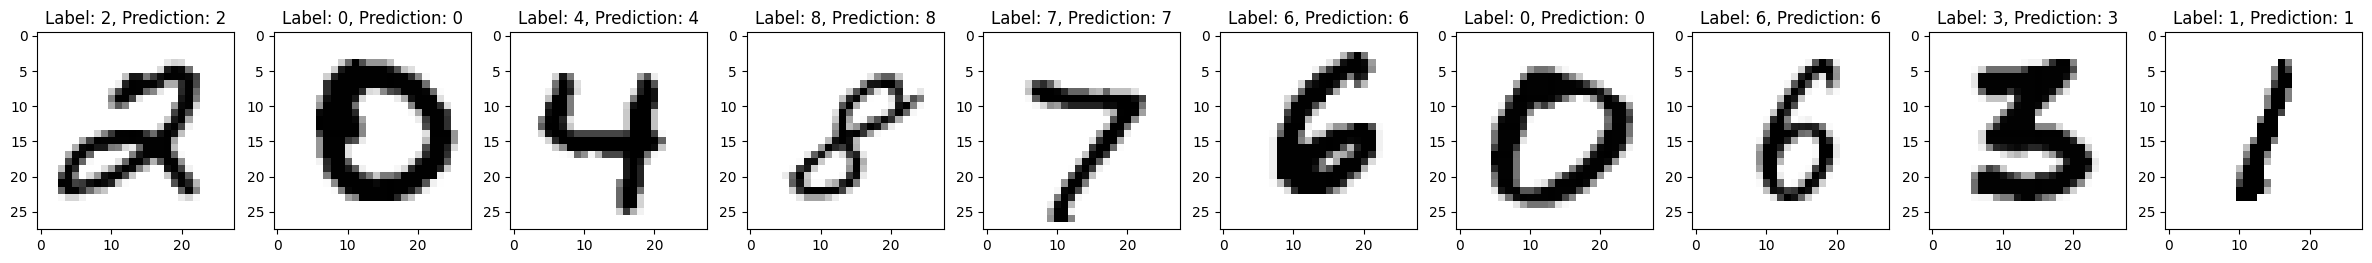

In [ ]:
for test_images, test_labels in testing_data.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = Model.predict(test_images)
  fig, axes = plt.subplots(1,10, figsize = (30,15))
  for i in range(10):
    axes[i].imshow(test_images[i], cmap = plt.cm.binary)
    axes[i].set_title("Label: {}, Prediction: {}".format(test_labels[i],np.argmax(predictions[i])))

print(predictions.shape)
print(np.argmax(predictions[0]))
print(test_labels[0])

#Testing with different activation function

In [ ]:
activation3 = tf.nn.sigmoid
activation4 = tf.nn.tanh
activation5 = tf.nn.leaky_relu

model_sigmoid = define_model(activation3,activation2)
model_tanh = define_model(activation4,activation2)
model_leaky_relu = define_model(activation5,activation2)

In [ ]:
model_sigmoid.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_tanh.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_leaky_relu.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_sigmoid.fit(training_data, epochs = 30, steps_per_epoch = math.ceil(num_training/batch_size))

Epoch 1/30
1200/1200 [==============================] - 9s 7ms/step - loss: 1.5379 - accuracy: 0.6771
Epoch 2/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.8055 - accuracy: 0.8316
Epoch 3/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.5928 - accuracy: 0.8588
Epoch 4/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.5034 - accuracy: 0.8720
Epoch 5/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4528 - accuracy: 0.8809
Epoch 6/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4165 - accuracy: 0.8885
Epoch 7/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.4042 - accuracy: 0.8879
Epoch 8/30
1200/1200 [==============================] - 7s 5ms/step - loss: 0.3827 - accuracy: 0.8937
Epoch 9/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3713 - accuracy: 0.8944
Epoch 10/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.364

In [ ]:
model_tanh.fit(training_data, epochs = 30, steps_per_epoch = math.ceil(num_training/batch_size))

Epoch 1/30
1200/1200 [==============================] - 7s 5ms/step - loss: 0.6514 - accuracy: 0.8384
Epoch 2/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.3774 - accuracy: 0.8944
Epoch 3/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3385 - accuracy: 0.9050
Epoch 4/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.3171 - accuracy: 0.9108
Epoch 5/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2981 - accuracy: 0.9167
Epoch 6/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.2900 - accuracy: 0.9175
Epoch 7/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2810 - accuracy: 0.9189
Epoch 8/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.2791 - accuracy: 0.9221
Epoch 9/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2683 - accuracy: 0.9240
Epoch 10/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.262

In [ ]:
model_leaky_relu.fit(training_data, epochs = 30, steps_per_epoch = math.ceil(num_training/batch_size))

Epoch 1/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.7237 - accuracy: 0.8262
Epoch 2/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3713 - accuracy: 0.8974
Epoch 3/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.3251 - accuracy: 0.9095
Epoch 4/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2977 - accuracy: 0.9171
Epoch 5/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.2788 - accuracy: 0.9233
Epoch 6/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2585 - accuracy: 0.9273
Epoch 7/30
1200/1200 [==============================] - 8s 6ms/step - loss: 0.2461 - accuracy: 0.9316
Epoch 8/30
1200/1200 [==============================] - 6s 5ms/step - loss: 0.2368 - accuracy: 0.9352
Epoch 9/30
1200/1200 [==============================] - 8s 7ms/step - loss: 0.2278 - accuracy: 0.9373
Epoch 10/30
1200/1200 [==============================] - 7s 6ms/step - loss: 0.217

In [ ]:
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(testing_data, steps = math.ceil(num_testing/batch_size))
test_loss_tanh, test_accuracy_tanh = model_tanh.evaluate(testing_data, steps = math.ceil(num_testing/batch_size))
test_loss_leaky_relu, test_accuracy_leaky_relu = model_leaky_relu.evaluate(testing_data, steps = math.ceil(num_testing/batch_size))

print("Test accuracy of sigmoid: ", test_accuracy_sigmoid)
print("Test accuracy of tanh: ", test_accuracy_tanh)
print("Test accuracy of leaky relu: ", test_accuracy_leaky_relu)

200/200 [==============================] - 1s 3ms/step - loss: 0.1238 - accuracy: 0.9635
Test accuracy of sigmoid:  0.9190000295639038
Test accuracy of tanh:  0.9549000263214111
Test accuracy of leaky relu:  0.9635000228881836


#Understanding Optimization algo

In [ ]:
model = define_model(activation1, activation2)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(training_data, epochs = 30, steps_per_epoch = math.ceil(num_training/batch_size))

Epoch 1/30
1200/1200 [==============================] - 11s 8ms/step - loss: 0.2115 - accuracy: 0.9372
Epoch 2/30
1200/1200 [==============================] - 9s 7ms/step - loss: 0.0829 - accuracy: 0.9758
Epoch 3/30
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0529 - accuracy: 0.9837
Epoch 4/30
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 5/30
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 6/30
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0240 - accuracy: 0.9926
Epoch 7/30
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 8/30
1200/1200 [==============================] - 10s 9ms/step - loss: 0.0134 - accuracy: 0.9958
Epoch 9/30
1200/1200 [==============================] - 11s 9ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 10/30
1200/1200 [==============================] - 9s 8ms/step - loss

#Logistic Regression vs Neural Networks

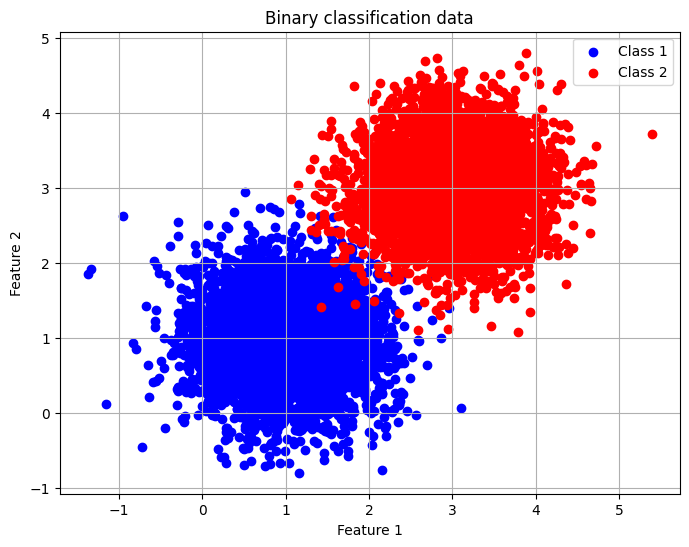

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


linear